- 일원 카이제곱검정 (chisquare , 카이제곱 적합도 검정)  
한 개의 요인에 의해 k개의 범주를 가질때 이론적 분포를 따르는지 검정  
  
  
- 이원 카이제곱검정 (chi2_contingency ,fisher_exact(빈도수 5개 이하 셀이 20% 이상일때) , 카이제곱독립검정)  
모집단이 두개의 변수에 의해 범주화 되었을 때, 두 변수들 사이의 관계가 독립인지 아닌지 검정

### Question

#### 144회 주사위를 던졌을때, 각 눈금별로 나온 횟수를 나타낸다. 이 데이터는 주사위의 분포에서 나올 가능성이 있는지 검정하라

In [1]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')
df

,dice_number,counts
0,1,24
1,2,20
2,3,28
3,4,22
4,5,28
5,6,22


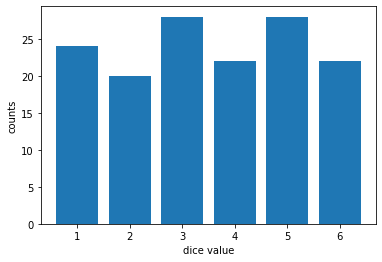

In [2]:
import matplotlib.pyplot as plt

plt.bar(df.dice_number,df.counts)
plt.xlabel('dice value')
plt.ylabel('counts')
plt.show()

#### 주사위 눈금의 발생확률은 1/6으로 모두 동일하다. 
#### 그러므로 각 눈금의 기댓값은 실제 발생한 모든값을 6으로 나눈 값이다.

In [3]:
from scipy.stats import chisquare

df['expected'] = (df['counts'].sum()/6).astype('int')
print(chisquare(df.counts,df.expected)) 

Power_divergenceResult(statistic=2.333333333333333, pvalue=0.8013589222076911)


#### p-value는 0.8로 귀무가설인 "각 주사위 눈금 발생비율은 동일함"을 기각 할 수 없다.

### Question

#### 다음 데이터는 어떤 집단의 왼손잡이, 오른손 잡이의 숫자를 나타낸다. 인간의 왼손잡이와 오른손잡이의 비율을 0.2:0.8로 알려져있다.
#### 이 집단에서 왼손과 오른손 잡이의 비율이 적합한지 검정하라

In [4]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/hands2.csv')
df

,hands
0,right
1,right
2,left
3,right
4,right
...,...
495,right
496,right
497,right
498,right


In [5]:
import matplotlib.pyplot as plt

target = df.hands.value_counts().to_frame()
target['expected'] = [int(target.hands.sum()*0.8),int(target.hands.sum()*0.2)]
display(target)

,hands,expected
right,420,400
left,80,100


In [6]:
from scipy.stats import chisquare
print(chisquare(target.hands,target.expected))

Power_divergenceResult(statistic=5.0, pvalue=0.025347318677468325)


#### 알려진 비율로 계산된 기댓값을 구하여 카이제곱검정을 시행한다.
#### p-value는 0.02로 유의수준 5%이내에서 귀무가설을 기각하고 대립가설을 채택한다.
#### 즉 주어진 집단의 왼손, 오른손 비율은 0.2, 0.8으로 볼 수 없다.

### Question

#### 다음 데이터는 국민 기초체력을 조사한 데이터이다. 성별과 등급이 독립적인지 검정하라

In [9]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
13391,61.0,M,167.0,65.8,22.2,71.0,130.0,33.7,14.5,37.0,182.0,C
13392,25.0,M,170.7,64.2,22.4,57.0,121.0,32.5,11.8,48.0,196.0,C
13393,47.0,M,166.2,77.5,22.8,84.0,133.0,52.4,11.9,45.0,220.0,B
13394,29.0,M,175.4,74.4,16.1,77.0,124.0,58.4,23.5,48.0,245.0,B


In [10]:
import matplotlib.pyplot as plt

cdf = pd.crosstab(df['측정회원성별'],df['등급'])
display(cdf)

등급,A,B,C,D
측정회원성별,,,,
F,1484,1130,1147,1120
M,1865,2219,2202,2229


In [13]:
from scipy.stats import chi2_contingency
print(chi2_contingency(cdf))

(120.06233631119409, 7.481892813401677e-26, 3, array([[1220.25, 1220.25, 1220.25, 1220.25],
       [2128.75, 2128.75, 2128.75, 2128.75]]))


In [15]:
chi2 , p ,dof, expected = chi2_contingency(cdf)
print(p)

7.481892813401677e-26


#### p-value는 0에 근접하므로 측정회원성별 - 등급은 연관이 없다는 귀무가설을 기각한다.
#### 성별 간 체력 등급간에는 관련이 있다고 볼 수 있다.

### Question

#### 성별에 따른 동아리 활동 참석 비율을 나타낸 데이터이다. 성별과 참석간에 관련이 있는지 검정하라

In [22]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/fe2.csv',index_col=0)
df

,불참,참석,총합
남성,4,2,6
여성,1,9,10
총합,5,11,16


In [23]:
import matplotlib.pyplot as plt

cdf = df.iloc[:-1,:-1]
display(cdf)

,불참,참석
남성,4,2
여성,1,9


In [24]:
from scipy.stats import chi2_contingency,fisher_exact
print(chi2_contingency(cdf))

(3.277575757575758, 0.07023259819117404, 1, array([[1.875, 4.125],
       [3.125, 6.875]]))


In [25]:
chi2 , p ,dof, expected = chi2_contingency(cdf)
print(p)

0.07023259819117404


In [26]:
print(fisher_exact(cdf))

(18.0, 0.035714285714285726)


#### 카이 제곱 검정시 p-value는 0.07로 귀무가설을 기각하지 못한다. 성별과 참석여부는 관련이 없다(독립이다).

#### 하지만 5보다 작은 셀이 20%가 넘어가므로(75%) 피셔의 정확검정을 사용 해야한다.
#### 피셔의 정확검정시 0.03의 값을 가지므로 귀무가설을 기각한다. 성별과 참석여부는 관련이 있다. (독립이 아니다)) 
